Code for Taxi Problem using Monte Carlo Algorithm


In [2]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
env= gym.make("Taxi-v3")
env.reset()


(148, {'prob': 1.0, 'action_mask': array([1, 1, 1, 0, 0, 0], dtype=int8)})

In [4]:
#initialising hyperparameters
episodes =5000                         
alpha = 0.1
gamma = 0.9             
epsilon =0.1
#initialising array to store total reward for each episode
total_rewards=np.zeros(episodes)

In [5]:
#initialising q-table
num_rows=env.observation_space.n
num_columns=env.action_space.n
qtable=np.zeros((num_rows,num_columns))

#function to carry out monte carlo updates
def monte_carlo_update(states, actions, rewards):
    G = 0  # Initialize the return
    for t in reversed(range(len(states))):
        state = states[t]
        action = actions[t]
        reward = rewards[t]
        G = gamma * G + reward
        qtable[state,action] += alpha * (G - qtable[state,action])

#function to run each episode
def episode():
    total_reward=0
    states=[]
    actions=[]
    rewards=[]
    state=env.reset()[0]
    done = False
    
    while not done:
        #choose action by epsilon-greedy policy
        if np.random.uniform(0,1)<epsilon:                                  
            action = env.action_space.sample()
        elif np.max(qtable[state])>0:
            action = np.argmax(qtable[state])
        else:
            action = env.action_space.sample()
        new_state,reward,terminated,truncated,info = env.step(action)
        done = truncated or terminated                                      #becomes true when the episode gets terminated or truncated
        #add reward to total reward
        total_reward+=reward
        rewards.append(reward)
        actions.append(action)
        states.append(state)
        state=new_state
    monte_carlo_update(states,actions,rewards)   
    return total_reward 

In [6]:
#run the episodes
for epi in range(episodes):
    total_rewards[epi]=episode()

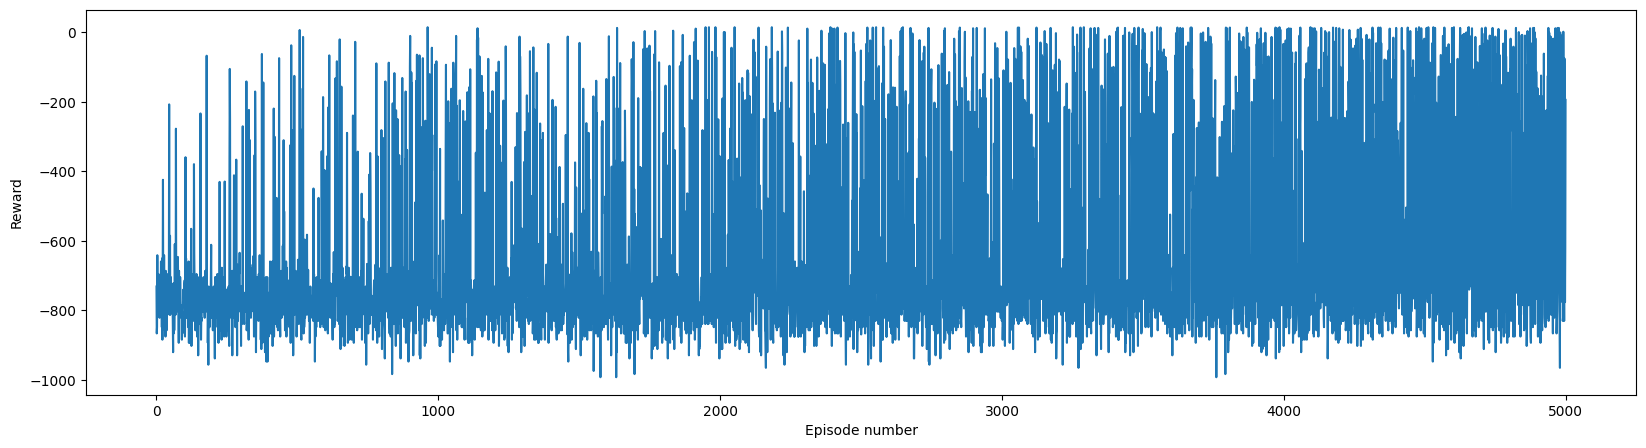

In [7]:
x= [i for i in range(episodes)]
y= total_rewards
plt.figure(figsize=(20,5))
plt.xlabel("Episode number")
plt.ylabel("Reward")
ax =plt.gca()
#plot the graph for episode no. vs total reward in each episode 
plt.plot(x,y)
plt.show()

In [8]:
sum=0
counter_successful=0
counter_unsuccessful=0
for number in range(1000):
    state=env.reset()[0]
    done = False
    total_reward=0
    while not done:
        action = np.argmax(qtable[state])
        new_state,reward,terminated,truncated,info = env.step(action)
        done = terminated or truncated
        total_reward+=reward
        
        state=new_state
    print(total_reward)
    if total_reward!=-200:
        sum=sum+total_reward
        counter_successful+=1
    else:
        counter_unsuccessful+=1
print("Average reward in successful runs:",sum/counter_successful)
print("No.of succesful runs:",counter_successful)
print("No.of unsuccessful runs:",counter_unsuccessful)

10
-200
-200
-200
-200
-200
-200
-200
-200
-200
11
-200
-200
-200
-200
-200
12
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
13
-200
8
-200
-200
-200
-200
-200
14
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
8
-200
-200
11
6
-200
11
-200
-200
-200
5
-200
11
11
-200
-200
-200
-200
-200
-200
-200
13
12
-200
11
11
-200
-200
-200
11
11
-200
-200
-200
-200
9
-200
-200
-200
13
11
-200
10
11
-200
-200
9
-200
-200
-200
-200
-200
-200
14
7
-200
-200
-200
-200
-200
-200
6
-200
-200
-200
-200
12
-200
-200
12
-200
-200
8
-200
9
-200
-200
9
-200
11
-200
-200
-200
-200
-200
10
-200
11
-200
6
-200
-200
10
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
-200
8
-200
12
-200
-200
-200
10
-200
11
-200
-200
-200
-200
-200
-200
-200
12
-200
-200
-200
-200
-200
9
-200
8
-200
-200
-200
7
13
11
-200
-200
-200
11
-200
-200
11
-200
-200
9
-200
-200
-200
11
5
11
11
-200
-200
11
14
10
-200
-200
-200
12
-200
7
-200
-200
-200
11
-200
-200
9
-200
-200
12
12
9
-200
-200
8
-200
-200
10
-200
-200
-

As we can see here, Monte Carlo algorithm successfully reaches the destination only 25-30% of times after 5000 training episodes. This number increases slightly to 35-40% when the training episodes are increased to 80000. Due to this Monte Carlo Algorithm is a really bad algorithm for this problem.
